In [3]:
import pandas as pd

table = pd.read_json("dim_customer.json")
table

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [4]:
huhu = pd.read_csv("fct_invoice.csv")
huhu

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


1. How many unique customers are in the dataset?

In [102]:
unique_customers = huhu['customer_id'].unique()
print(len(unique_customers))

5191


2. What are the different categories of products available? How many unique categories are there?

In [108]:
product_category = huhu["category"].unique() 
print(product_category)
print(len(product_category))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


Easy
3. Which payment method is the most popular? How many times was it used?

In [86]:
yes = huhu['payment_method']
omg=list(yes)
cc=0
dc=0
c=0
for i in omg:
    if i == "Credit Card":
        cc += 1
    if i == "Debit Card":
        dc += 1
    if i == "Cash":
        c += 1

if c>cc and c>dc:
    print("Cash " + str(c))
if dc>cc and dc>c:
    print ("Debit Card " + str(dc))
if cc>dc and cc>c:
    print("Credit Card " + str(cc))

Cash 44447


Medium

1. What are the three most popular categories, by total sales?

In [94]:
categories = huhu["category"].unique()
list(categories)

total_revenue = huhu['quantity'] * huhu['price']
huhu['total_revenue'] = total_revenue
category_sales = huhu.groupby('category')['total_revenue'].sum()
top_3_categories = category_sales.nlargest(3)
print(top_3_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_revenue, dtype: float64


Medium

2. What are the total sales attributed to customers over the age of 45?

In [27]:
yup = pd.merge(table, huhu, left_on="id", right_on="customer_id").drop('customer_id', axis=1)
age = 45
total_revenue = yup['quantity'] * yup['price']
filtered_table = yup[yup['age'] > age]
over_45_sales = total_revenue.sum()
print(over_45_sales)

251505794.25


Medium

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

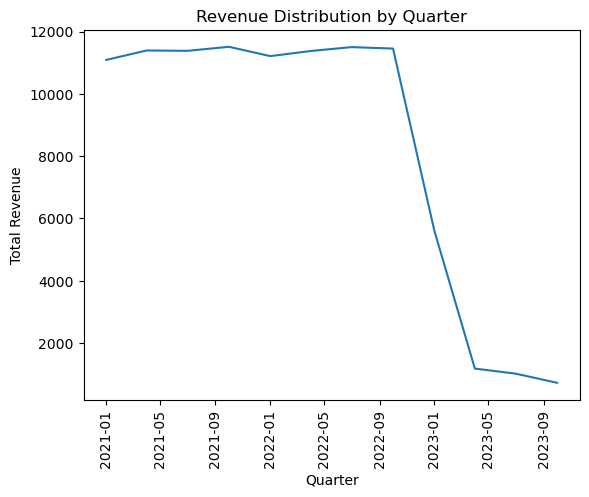

In [34]:
import matplotlib.pyplot as plt
from datetime import date

yup['invoice_date'] = pd.to_datetime(yup['invoice_date'])
yup['Quarter'] = yup['invoice_date'].dt.to_period('Q')

total_revenue_per_quarter = yup.groupby('Quarter').size()

total_revenue_per_quarter.index = total_revenue_per_quarter.index.to_timestamp()

plt.plot(total_revenue_per_quarter.index, total_revenue_per_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Revenue Distribution by Quarter')
plt.xticks(rotation=90)
plt.show()

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [82]:
from pandas.core.reshape.pivot import pivot_table
from pandas import Series

total_revenue = yup['quantity'] * yup['price']
yup['total_revenue'] = total_revenue
grouped_data = yup.groupby(['category', 'age_range'])['total_revenue'].sum().reset_index()
pivot_table = grouped_data.pivot_table(index='category', columns='age_range', values='total_revenue')
pivot_table

age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,7923.45,76022.70,87157.95,87885.15,72735.15,81885.75,57706.35,29224.35,0.0
Clothing,0.0,1144505.12,9959955.28,11540776.72,11447451.84,9943150.80,11083154.72,8061649.20,4812382.96,0.0
Cosmetics,0.0,65991.18,583796.28,731310.76,682396.78,563954.20,669832.84,443722.58,274495.66,0.0
Food & Beverage,0.0,9434.92,68633.29,87911.07,91922.48,72132.16,81488.63,58256.97,33879.94,0.0
Shoes,0.0,634379.69,5571978.28,7303468.73,7163028.95,5778436.76,6131336.72,4675324.30,2827400.87,0.0
Souvenir,0.0,6181.71,54438.93,63834.66,68444.55,54966.78,57418.35,38216.34,26662.29,0.0
Technology,0.0,739200.00,5053650.00,6298950.00,6082650.00,4458300.00,5421150.00,3808350.00,2134650.00,0.0
Toys,0.0,35911.68,366392.32,424704.00,408253.44,330516.48,370693.12,293888.00,162856.96,0.0
